In [43]:
## imports
import pandas as pd
import numpy as np

## import the plotnine package
## make sure it's installed
## if not installed, can use
## ! pip install plotnine
import plotnine
from plotnine import *


## print multiple things from same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# A few plot types

## Load DC crime data

In [44]:
## load data on 2020 crimes in DC
dc_crim_2020 = pd.read_csv("https://opendata.arcgis.com/datasets/f516e0dd7b614b088ad781b0c4002331_2.csv")
dc_crim_2020.head()


,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID
0,-76.934427,38.907774,20000882,2020/01/02 16:22:08+00,DAY,OTHERS,THEFT F/AUTO,4701 - 4799 BLOCK OF MINNESOTA AVENUE NE,405687.60000,137769.450000,...,007806 2,7806.0,Precinct 93,38.907766,-76.934425,NaN,2019/12/31 10:55:28+00,2019/12/31 18:00:36+00,97918765,NaN
1,-77.018211,38.881288,20000889,2020/01/02 16:03:28+00,DAY,OTHERS,THEFT F/AUTO,400 - 499 BLOCK OF G STREET SW,398420.05318,134827.383451,...,010202 2,10202.0,Precinct 142,38.881280,-77.018209,SOUTHWEST,2020/01/01 14:00:48+00,2020/01/02 14:00:53+00,97918766,NaN
2,-76.973957,38.919579,20000890,2020/01/02 16:11:25+00,DAY,OTHERS,THEFT F/AUTO,2000 - 2299 BLOCK OF ADAMS PLACE NE,402258.64000,139078.150000,...,011100 3,11100.0,Precinct 72,38.919571,-76.973955,NaN,2020/01/02 15:26:44+00,NaN,97918767,NaN
3,-77.014595,38.973548,20000898,2020/01/02 16:55:17+00,DAY,OTHERS,THEFT/OTHER,6900 - 6999 BLOCK OF WILLOW STREET NW,398735.50000,145069.030000,...,001702 2,1702.0,Precinct 63,38.973540,-77.014592,NaN,2020/01/02 14:34:36+00,2020/01/02 15:01:37+00,97918768,NaN
4,-77.005210,38.877533,20000902,2020/01/02 17:08:59+00,DAY,OTHERS,THEFT F/AUTO,100 - 149 BLOCK OF L STREET SE,399548.11000,134410.420000,...,007202 1,7202.0,Precinct 131,38.877525,-77.005208,CAPITOL RIVERFRONT,2020/01/02 12:00:14+00,2020/01/02 16:19:15+00,97918769,NaN


## Plot type one: bar plot

**Goal**: bar plot where x axis is what shift it is; y axis is the count of unique crime reports (using `OBJECT_ID` as unique indicator)

,SHIFT,OBJECTID
0,DAY,10092
1,EVENING,12315
2,MIDNIGHT,5508


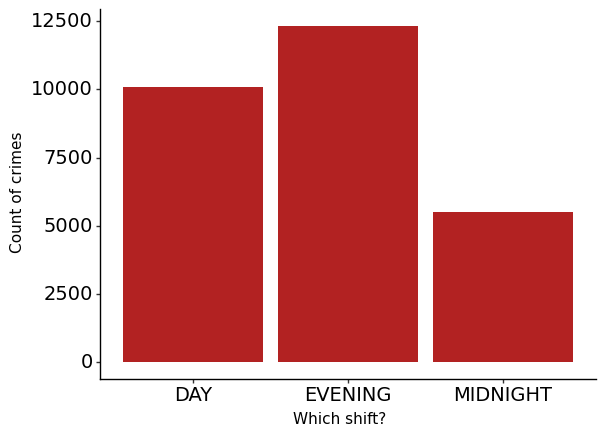

<ggplot: (8790109387400)>

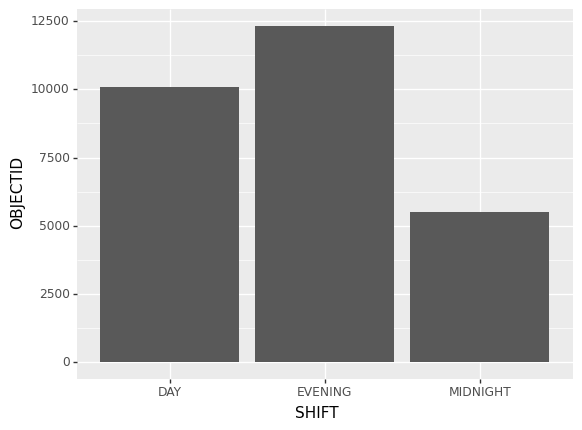

<ggplot: (8790099044642)>

In [45]:
## step one: create the summary we want to plot
count_byshift = pd.DataFrame(dc_crim_2020.groupby('SHIFT')['OBJECTID'].nunique()).reset_index()
count_byshift

## one way: plot and display in notebook
(ggplot(count_byshift, aes(x = 'SHIFT', 
            y = 'OBJECTID')) + # base layer with data and x and y axis 
            geom_bar(stat = "identity", fill = "firebrick") + # telling it to expect a bar chart; identity
             # arg just means to use the y value 
            theme_classic() + # aesthetics
            xlab("Which shift?") + # custom label for x axis
            ylab("Count of crimes") + # custom label for y axis
            theme(axis_text = element_text(size = 14, color = "black"))) # make font bigger

## another way: save to png- right now,
## it's writing to same path our df is stored in; 
plot_shifts = (ggplot(count_byshift, aes(x = 'SHIFT', 
            y = 'OBJECTID')) +
            geom_bar(stat = "identity", fill = "firebrick") +
            theme_classic() +
            xlab("Which shift?") +
            ylab("Count of crimes") +
            theme(axis_text = element_text(size = 14, color = "black")))
plot_shifts.save("plot_shifts.png", 
                width = 12,
                height = 8,
                verbose = False)


## what happens if we don't specify theme or color of bars? diff aesthetics
## also doesnt give us informative x and y labels (for pset please give 
## informative labels)
(ggplot(count_byshift, aes(x = 'SHIFT', 
            y = 'OBJECTID')) +
            geom_bar(stat = "identity"))

## Plot type two: line graph

**Goal**: bar plot where x axis is month; y axis is the count of unique crime reports (using `OBJECT_ID` as unique indicator); want line graph to be able to see trends over time in count of reported crimes

,REPORT_DAT,report_month
19800,2020/04/04 20:33:55+00,4
21974,2020/02/10 06:47:19+00,2
13788,2020/08/07 17:39:55+00,8


,report_month,OBJECTID
0,1,2948
1,2,2537
2,3,2200
3,4,1652
4,5,1832
5,6,2275
6,7,2132
7,8,2431
8,9,2572
9,10,2562


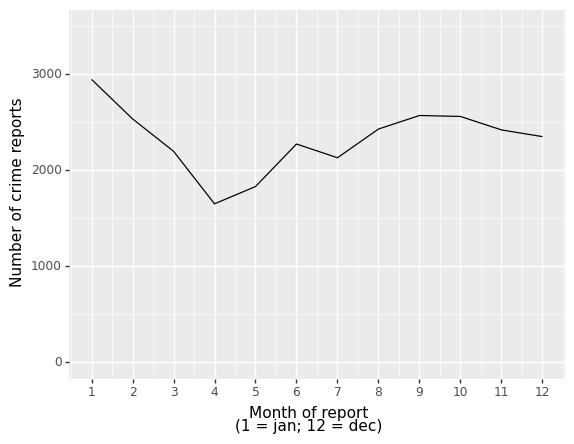

<ggplot: (8790109388563)>

In [46]:
## group by month and find unique reports
### first, extract month from report_dat (just 
### with the noncleaned version)

dc_crim_2020['report_month'] = pd.to_datetime(dc_crim_2020.REPORT_DAT,
                                             errors = "coerce").dt.month
### double check this worked
dc_crim_2020[["REPORT_DAT", "report_month"]].sample(n = 3)

### then, group by month and find unique reports; same syntax as above
### just a diff grouping variable 
count_bymonth = pd.DataFrame(dc_crim_2020.groupby('report_month')['OBJECTID'].nunique()).reset_index()
count_bymonth

### finally, plot result as line graph
### nearly identical syntax to above
### but uses month as the xaxis rather than
### police shift and geom_line()
### rather than geom_bar()
(ggplot(count_bymonth, aes(x = 'report_month', 
            y = 'OBJECTID')) +
            geom_line() +
            ylim(0, 3500) +
            xlab("Month of report\n(1 = jan; 12 = dec)") +
            ylab("Number of crime reports") +
            scale_x_continuous(breaks = np.arange(1, 13)))

## Making more complex: adding facets

What if we want to create the above but visualize separately for each ward?

Can group by two variables (see lecture slide) and add a line to facet_wrap

,report_month,WARD,OBJECTID
0,1,1,369
1,1,2,654
2,1,3,222
3,1,4,313
4,1,5,456


,report_month,WARD,OBJECTID
91,12,4,253
92,12,5,380
93,12,6,305
94,12,7,343
95,12,8,278


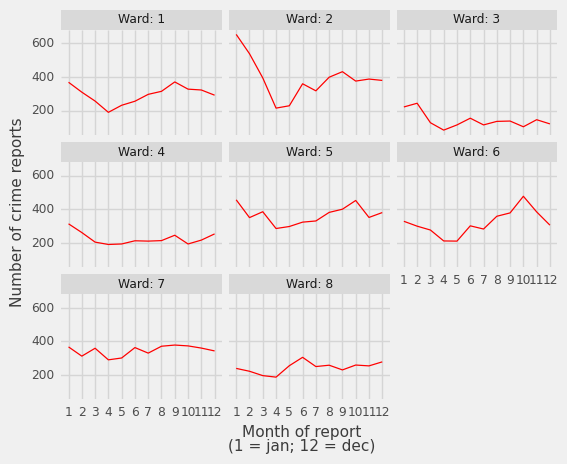

<ggplot: (8790103623858)>

In [52]:
### add ward as grouping var
count_bymonth_byw = pd.DataFrame(dc_crim_2020.groupby(['report_month',
                                                   'WARD'])['OBJECTID'].nunique()).reset_index()
count_bymonth_byw.head()
count_bymonth_byw.tail()

## make the facetting var prettier 
## by noting "Ward" before the
count_bymonth_byw['WARD_name'] = 'Ward: ' + count_bymonth_byw.WARD.astype(str)

### finally, plot result as line graph
### nearly identical syntax to above
### but uses month as the xaxis rather than
### police shift and geom_line()
### rather than geom_bar()
(ggplot(count_bymonth_byw, aes(x = 'report_month', 
            y = 'OBJECTID')) +
            geom_line(color = "red") +
            xlab("Month of report\n(1 = jan; 12 = dec)") +
            ylab("Number of crime reports") +
            facet_wrap('WARD_name') + # ADDITIONAL LINE 
            scale_x_continuous(breaks = np.arange(1, 13)) +
            theme_538() # using 538 theme 
            ) 